In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from glob import glob
from skimage.io import imread
from scipy.io import loadmat

images_folder_path = './BSR/BSDS500/data/images/'
gt_folder_path = './BSR/BSDS500/data/groundTruth/'

In [53]:
images_paths = sorted(glob(f'{images_folder_path}train/*.jpg'))
gt_paths = sorted(glob(f'{gt_folder_path}train/*.mat'))

images = [imread(path) / 255.0 for path in images_paths]
gts = [loadmat(path)['groundTruth'][0][0][0][0][0] for path in gt_paths]

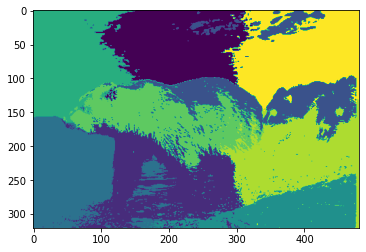

In [57]:
clf = KMeans(9)
img = images[0]
x = np.linspace(0, 1, img.shape[0])
y = np.linspace(0, 1, img.shape[1])
xx, yy = np.meshgrid(x, y, indexing='ij')
new_img = np.dstack((img, xx, yy))
labels = clf.fit_predict(new_img.reshape(-1, 5))
plt.imshow(img)
plt.imshow(labels.reshape(img.shape[:2]))